### Developing a Quantum Machine Learning Model for Learning the Sine Function

To create a Quantum Machine Learning (QML) model that learns the sine function over the interval \([0, 2\pi]\) using PennyLane, you can follow these detailed steps:

#### 1. **Discretize the Interval**

   - **Objective**: Divide the interval \([0, 2\pi]\) into discrete points for which you will compute the sine function values. These values will act as labels for training your model.
   - **Steps**:
     1. Choose a suitable number of points to discretize the interval. For instance, you might select 100 points to ensure a smooth approximation.
     2. Generate an array of evenly spaced points within the interval \([0, 2\pi]\).
     3. Compute the sine values for these points, which will serve as the target values for the model.

#### 2. **Define the Quantum Circuit**

   - **Objective**: Construct a quantum circuit that models the sine function. A variational quantum circuit with angle embedding and strongly entangling layers is defined.
   - **Steps**:
     1. Initialize a quantum device, typically using a small number of qubits to keep the model manageable.
     2. Design a quantum circuit that includes parameterized gates to learn the sine function. Common choices include rotation and squeezing operations, which can be tuned to fit the sine function.
     3. Implement a quantum node that encodes the input data and produces output that reflects the quantum circuit’s behavior.

#### 3. **Define the Cost Function**

   - **Objective**: Measure how closely the quantum circuit's output matches the sine function values. The mean squared error between the predicted values and the true sine values is used as the cost function.
   - **Steps**:
     1. Use a mean squared error (MSE) approach to evaluate the discrepancy between the predicted values from the quantum circuit and the actual sine function values.
     2. Implement a cost function that calculates the average squared error across all discretized data points.

#### 4. **Train the Model**

   - **Objective**: Optimize the parameters of the quantum circuit to minimize the cost function.
   - **Steps**:
     1. Initialize the parameters for the quantum circuit, typically with random values to start.
     2. Use an optimization algorithm to iteratively adjust these parameters and minimize the cost function. An optimizer such as the Adam optimizer is commonly used.
     3. Repeat the optimization process through multiple iterations until the model converges to a solution where the quantum circuit closely approximates the sine function.

By following these steps, we will develop and train a quantum machine learning model that learns to approximate the sine function. This framework provides a foundation, which can be refined with more complex quantum circuits and advanced optimization techniques for improved performance.

## Code sections:



**Import Libraries:** Import the necessary libraries for quantum computing (`pennylane`), numerical operations (`numpy`), optimization (`AdamOptimizer`), and plotting (`matplotlib`).



In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt


**Generate Sine Wave Data:** 
- Create an array `x_data` with 100 equally spaced points between -1 and 1.
- Compute the sine values of these points scaled by π and store them in `y_data`.


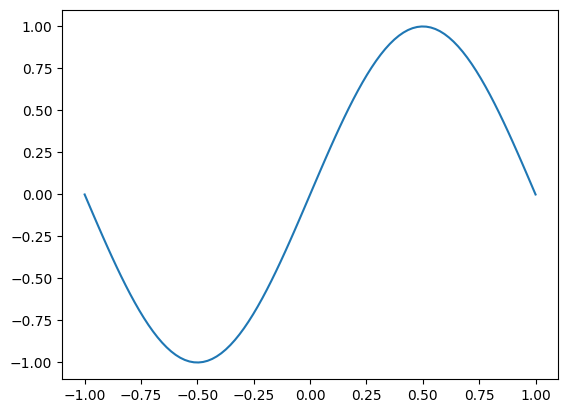

In [2]:
# Generate sine wave data
x_data = np.linspace(-1, 1, 100)
y_data = np.sin(x_data * np.pi)  # Generate sine values
plt.plot(x_data, y_data) 


**Define the Quantum Device:**
- Initialize a quantum device using PennyLane's "strawberryfields.fock" backend, simulating a system with 1 qubit and a cutoff dimension of 10. This device will be used to run the quantum circuits.


In [3]:
# Define the device to run the program
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)


2024-08-08 00:55:18.038108: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-08 00:55:18.587172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-08 00:55:18.771780: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-08 00:55:18.826338: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-08 00:55:19.197682: I tensorflow/core/platform/cpu_feature_guar


**Define the Quantum Circuit Layer:**
- Create a function `layer(v)` to define a quantum layer in the neural network.
  - Apply a series of quantum operations parameterized by `v`, which includes:
    - `qml.Rotation(v[0], wires=0)`: Applies a rotation gate with angle `v[0]`.
    - `qml.Squeezing(v[1], 0.0, wires=0)`: Applies a squeezing gate with parameter `v[1]`.
    - `qml.Rotation(v[2], wires=0)`: Applies another rotation gate with angle `v[2]`.
    - `qml.Displacement(v[3], 0.0, wires=0)`: Applies a displacement gate with parameter `v[3]`.
    - `qml.Kerr(v[4], wires=0)`: Applies a Kerr gate with parameter `v[4]`.


In [5]:
# Step Two: Define the quantum node
def layer(v):
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)
    qml.Displacement(v[3], 0.0, wires=0)
    qml.Kerr(v[4], wires=0)


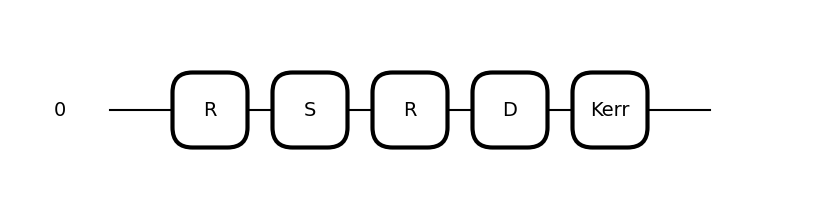

In [26]:

# Draw the circuit
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(layer)(np.random.randn(5 , 4  ))
plt.show()


**Create the Quantum Neural Network:**
- Define the quantum neural network function `quantum_neural_net(var, x=None)` using PennyLane's `@qml.qnode` decorator.
  - Encode input `x` into a quantum state using `qml.Displacement(x, 0.0, wires=0)`.
  - Apply the parameterized quantum layer to this state.
  - Measure and return the expectation value of the Pauli-X observable (`qml.X(0)`).



In [14]:
# Step Three: Create the Quantum Neural Network
@qml.qnode(dev)
def quantum_neural_net(var, x=None):
    qml.Displacement(x, 0.0, wires=0)
    for v in var:
        layer(v)
    return qml.expval(qml.X(0))

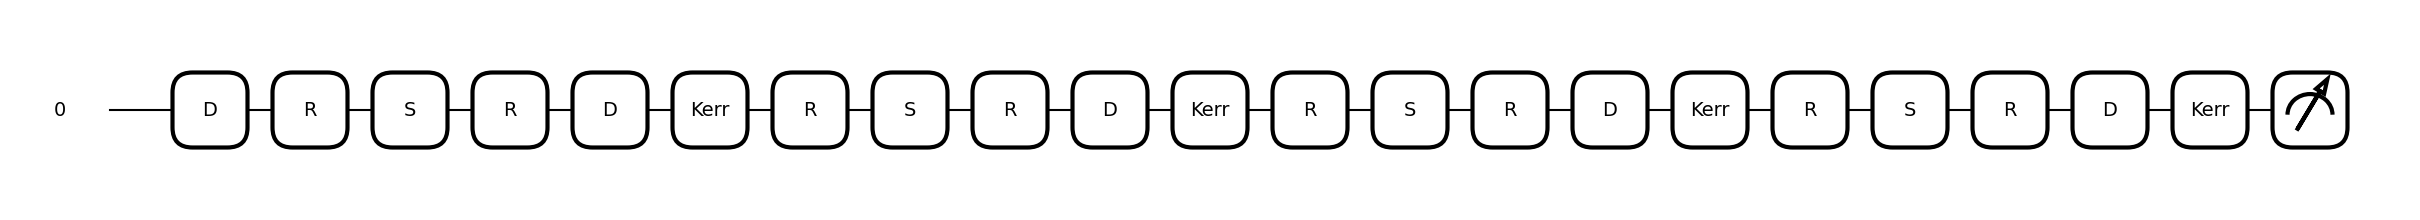

In [19]:

# Draw the circuit
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(quantum_neural_net)(np.random.randn(4 , 5 ))
plt.show()


**Define the Objective Function:**
- Implement `square_loss(labels, predictions)` to calculate the mean squared error loss between true labels and predictions.
- Define the `cost(var, features, labels)` function that uses the quantum neural network to generate predictions and then computes the loss.


In [27]:
# Step Four: Define the Objective Function
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2
    loss = loss / len(labels)
    return loss

def cost(var, features, labels):
    preds = [quantum_neural_net(var, x=x) for x in features]
    return square_loss(labels, preds)


**Initialize Neural Network Parameters:**
- Set a random seed for reproducibility.
- Define `num_layers` as 4, representing the number of layers in the quantum neural network.
- Initialize the network parameters `var_init` with small random values and print them.


In [28]:
# Step Five: Define the Neural Network Parameters and Weights
np.random.seed(0)
num_layers = 4
var_init = 0.05 * np.random.randn(num_layers, 5)
print(var_init)

[[ 0.08820262  0.02000786  0.0489369   0.11204466  0.0933779 ]
 [-0.04886389  0.04750442 -0.00756786 -0.00516094  0.02052993]
 [ 0.00720218  0.07271368  0.03805189  0.00608375  0.02219316]
 [ 0.01668372  0.07470395 -0.01025791  0.01565339 -0.04270479]]



**Update Weights Using Optimizer:**
- Set up the Adam optimizer with a learning rate of 0.01 and beta parameters (beta1=0.9, beta2=0.999).
- Use the optimizer to minimize the cost function over a maximum of 500 iterations.
  - Print the cost every 20 iterations to monitor the optimization process.
  - Check for convergence based on a tolerance level (`tol`), and print convergence information if the cost difference is below the tolerance.


In [29]:
# Step Six: Update the Weights Using Optimizer
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

var = var_init
cost_history = []
tol = 1e-4  # Tolerance for convergence
prev_cost = float('inf')
verbose = 1  # Control verbosity: 0 = silent, 1 = progress bar, 2 = detailed output

for it in range(500):
    var, _cost = opt.step_and_cost(lambda v: cost(v, x_data, y_data), var)
    cost_history.append(_cost)
    if abs(prev_cost - _cost) < tol:  # Stopping condition based on tolerance
        if verbose:
            print(f"Converged at iteration {it} with cost {_cost:.7f}")
        break
    prev_cost = _cost
    if verbose == 1 and it % 20 == 0:  # Print cost every 20 iterations
        print("Iter: {:5d} | Cost: {:0.7f} ".format(it, _cost))
    elif verbose == 2:
        print("Iter: {:5d} | Cost: {:0.7f} ".format(it, _cost))


Iter:     0 | Cost: 0.3636570 
Iter:    20 | Cost: 0.0840032 
Iter:    40 | Cost: 0.0277779 
Iter:    60 | Cost: 0.0099678 
Iter:    80 | Cost: 0.0025071 
Converged at iteration 87 with cost 0.0016120



**Output and Process Predictions:**
- Generate predictions by evaluating the quantum neural network at 50 equally spaced points within the range of -1 to 1.
- Plot the actual sine values and the predicted values from the quantum neural network to visualize the approximation.



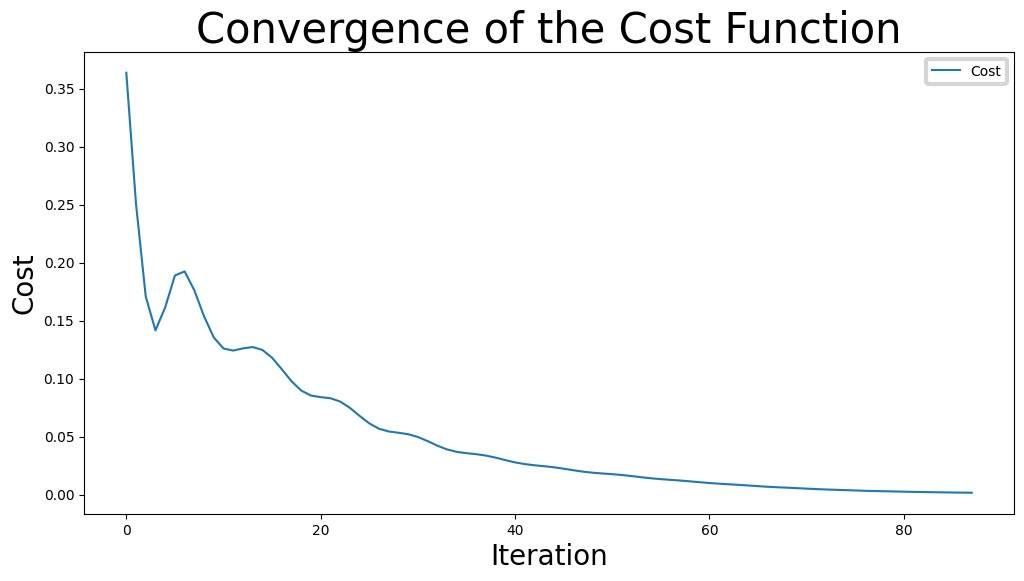

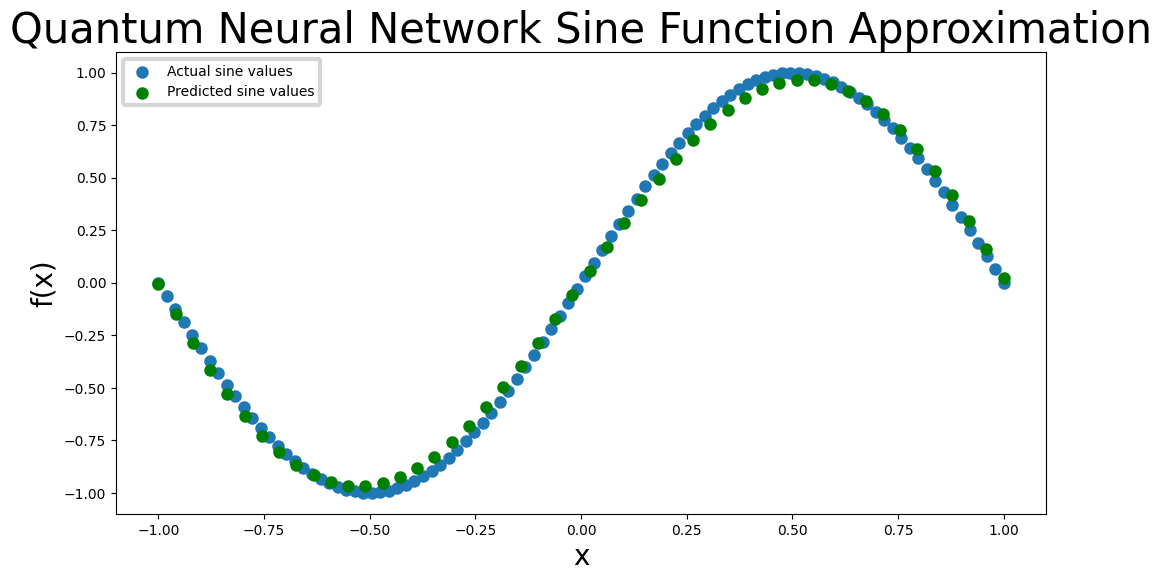

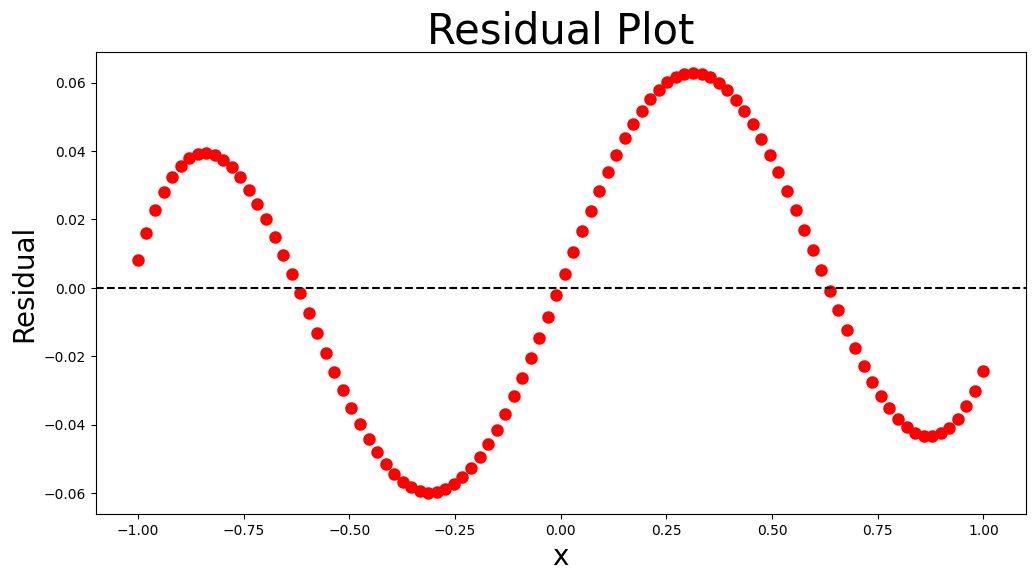

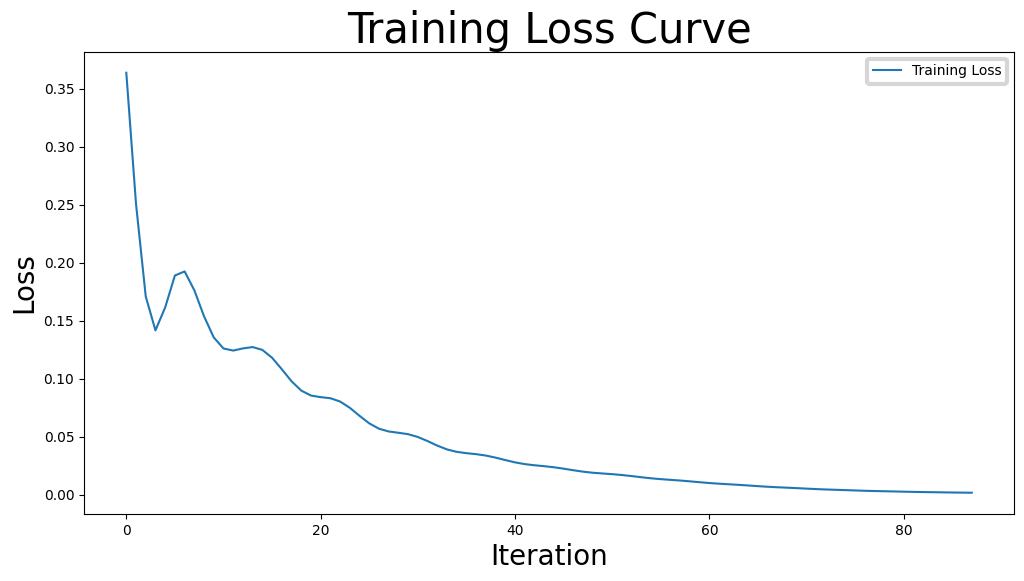

In [35]:
# Plot the convergence of the cost function
plt.figure(figsize=(12, 6))
plt.plot(cost_history, label='Cost')
plt.xlabel('Iteration',fontsize=20 )
plt.ylabel('Cost',fontsize=20 )
plt.legend()
plt.title('Convergence of the Cost Function',fontsize=30  )
plt.show()

# Step Seven: Output and Process the Predictions of the Quantum Neural Network
x_pred = np.linspace(-1, 1, 50)
predictions = [quantum_neural_net(var, x_) for x_ in x_pred]

# Plot the shape of the function that the quantum neural network has “learned” from the function and the predicted values
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, label="Actual sine values")
plt.scatter(x_pred, predictions, color="green", label="Predicted sine values")
plt.xlabel("x",fontsize=20 )
plt.ylabel("f(x)",fontsize=20 )
plt.legend()
plt.title("Quantum Neural Network Sine Function Approximation",fontsize=30 )
plt.show()

# Residual Plot
residuals = y_data - np.array([quantum_neural_net(var, x_) for x_ in x_data])
plt.figure(figsize=(12, 6))
plt.scatter(x_data, residuals, color="red")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x',fontsize=20 )
plt.ylabel('Residual',fontsize=20 )
plt.title('Residual Plot',fontsize=30 )
plt.show()

# Loss Curve Analysis
plt.figure(figsize=(12, 6))
plt.plot(cost_history, label='Training Loss')
plt.xlabel('Iteration',fontsize=20 )
plt.ylabel('Loss',fontsize=20 )
plt.title('Training Loss Curve',fontsize=30 )
plt.legend()
plt.show()
